In [70]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from scipy import stats

In [4]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [5]:
# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata, study_results,
                                 how='outer', on='Mouse ID')

In [6]:
# Display the data table for preview
combined_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice.
len(combined_data_df)

1893

In [9]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
combined_data_group = combined_data_df.groupby("Mouse ID")
mouseid_timepoint_df = pd.DataFrame(combined_data_group["Timepoint"].value_counts())
mouseid_timepoint_dups = mouseid_timepoint_df.loc[mouseid_timepoint_df["Timepoint"] > 1]
mouseid_timepoint_dups

Timepoint
Mouse ID Timepoint           
g989     0                  2
         5                  2
         10                 2
         15                 2
         20                 2

In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = combined_data_df.drop([909, 911, 913, 915, 917], axis=0)
clean_data_df = clean_data_df.reset_index(drop=True)
clean_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,25,63.145652,2
1884,z969,Naftisol,Male,9,30,30,65.841013,3
1885,z969,Naftisol,Male,9,30,35,69.176246,4
1886,z969,Naftisol,Male,9,30,40,70.314904,4


In [14]:
# Checking the number of mice in the clean DataFrame.
len(clean_data_df)

1888

In [44]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
clean_data_group = clean_data_df.groupby("Drug Regimen")

mean = clean_data_group["Tumor Volume (mm3)"].mean()
median = clean_data_group["Tumor Volume (mm3)"].median()

var = clean_data_group["Tumor Volume (mm3)"].var()
std = clean_data_group["Tumor Volume (mm3)"].std()
sem = clean_data_group["Tumor Volume (mm3)"].sem()

summary_pd = pd.DataFrame({"Mean Tumor Volume": mean, "Median Tumor Volume": median, "Tumor Volume Variance": var, "Tumor Volume Std. Dev.": std, "Tumor Volume Std. Err.": sem})

summary_pd

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [17]:
 # Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

summary_aggregation_pd = clean_data_group.agg({"Tumor Volume (mm3)": [('Mean Tumor Volume','mean'), ('Median Tumor Volume','median'), ('Tumor Volume Variance', 'var'), ('Tumor Volume Std. Dev.', 'std'), ('Tumor Volume Std. Err.', 'sem')]})

summary_aggregation_pd

Tumor Volume (mm3)                                            \
              Mean Tumor Volume Median Tumor Volume Tumor Volume Variance   
Drug Regimen                                                                
Capomulin             40.675741           41.557809             24.947764   
Ceftamin              52.591172           51.776157             39.290177   
Infubinol             52.884795           51.820584             43.128684   
Ketapril              55.235638           53.698743             68.553577   
Naftisol              54.331565           52.509285             66.173479   
Placebo               54.033581           52.288934             61.168083   
Propriva              52.393463           50.909965             43.138803   
Ramicane              40.216745           40.673236             23.486704   
Stelasyn              54.233149           52.431737             59.450562   
Zoniferol             53.236507           51.818479             48.533355   

                                                            
             Tumor Volume Std. Dev. Tumor Volume Std. Err.  
Drug Regimen                                                
Capomulin                  4.994774               0.329346  
Ceftamin                   6.268188               0.469821  
Infubinol                  6.567243               0.492236  
Ketapril                   8.279709               0.603860  
Naftisol                   8.134708               0.596466  
Placebo                    7.821003               0.581331  
Propriva                   6.568014               0.525862  
Ramicane                   4.846308               0.320955  
Stelasyn                   7.710419               0.573111  
Zoniferol                  6.966589               0.516398

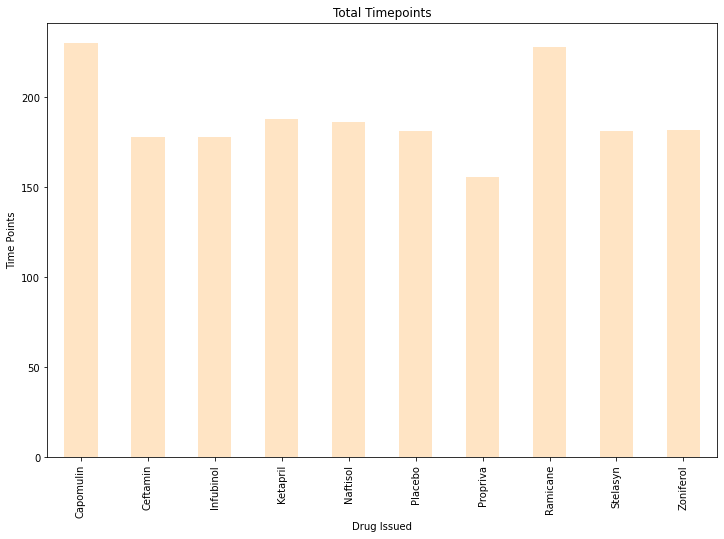

<Figure size 432x288 with 0 Axes>

In [36]:
 # Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
    # Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
regimen_timepoints_pd = clean_data_group["Timepoint"].count()
#regimen_aggregation_pd

regimen_timepoints_pd.plot(kind="bar", color='bisque', figsize=(12,8))

plt.title("Total Timepoints")
plt.xlabel("Drug Issued", )
plt.ylabel("Time Points")

plt.show()
plt.tight_layout()

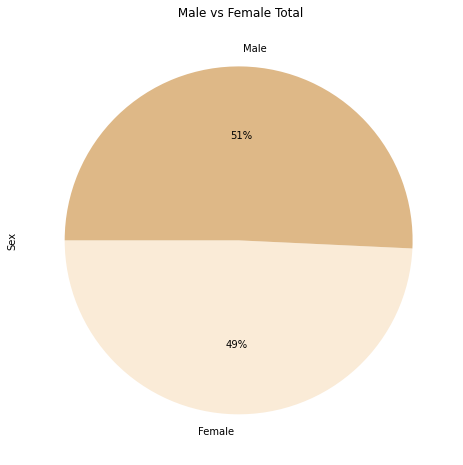

In [42]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
regimen_sex_pd = clean_data_df.groupby("Sex")
regimen_sex_count = regimen_sex_pd['Mouse ID'].count()
regimen_sex_count

regimen_sex_count.plot(kind="pie", colors=('antiquewhite','burlywood'), figsize=(12,8), autopct='%1.0f%%', startangle=180)


plt.title(" Male vs Female Total")
plt.ylabel("Sex")
plt.show()

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


#was a little confused on what this was asking. I though I did this above   

In [45]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
clean_data_group_df = clean_data_df.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
clean_data_group_df

summary_aggregation_pd = pd.merge(clean_data_df, clean_data_group_df, on=["Drug Regimen", "Mouse ID"])
summary_aggregation_pd = summary_aggregation_pd.rename(columns={
    "Tumor Volume (mm3)_x": "Tumor Volume (mm3)",
    "Tumor Volume (mm3)_y": "Tumor Volume on Last Timepoint"
})
summary_aggregation_pd.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Tumor Volume on Last Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,22.050126
1,k403,Ramicane,Male,21,16,5,38.825898,0,22.050126
2,k403,Ramicane,Male,21,16,10,35.014271,1,22.050126
3,k403,Ramicane,Male,21,16,15,34.223992,1,22.050126
4,k403,Ramicane,Male,21,16,20,32.997729,1,22.050126


In [53]:

# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers.   
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds
treatments = ['Capomulin','Ramicane','Infubinol','Ceftamin']  

tumor_volumes = []

for treatment in treatments:
    summary_aggregation_in_drugs = summary_aggregation_pd.loc[summary_aggregation_pd['Drug Regimen'] == treatment]
    tumor_volume = summary_aggregation_in_drugs.groupby('Mouse ID')['Tumor Volume on Last Timepoint'].max()
    tumor_volume_df = pd.DataFrame(tumor_volume)
    tumor_vols = [vol for vol in tumor_volume_df['Tumor Volume on Last Timepoint']]
    tumor_volumes.append(tumor_vols)
    
tumor_vols_df = pd.Series(tumor_vols)

quartiles = tumor_vols_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The Information for {treatment}")
print(f"The lower quartile of tumor volumes is: {lowerq}")
print(f"The upper quartile of tumor volumes is: {upperq}")
print(f"The interquartile range of tumor volumes is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

The Information for Ceftamin
The lower quartile of tumor volumes is: 48.72207785
The upper quartile of tumor volumes is: 64.29983003
The interquartile range of tumor volumes is: 15.577752179999997
The the median of temperatures is: 59.85195552 


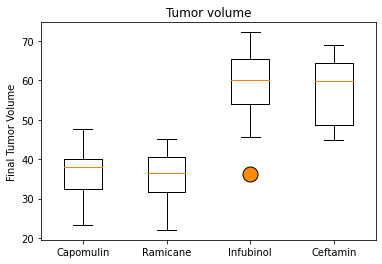

In [56]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor volume')
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot(tumor_volumes, labels=treatments, flierprops={'marker': 'o', 'markersize': 15, 'markerfacecolor': 'darkorange'})
plt.show()   

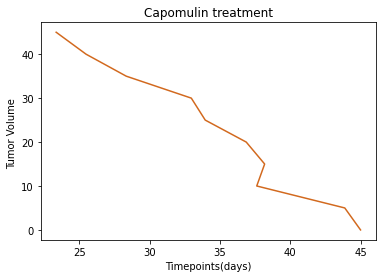

In [59]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
clean_data_Capomulin = clean_data_df.loc[(clean_data_df['Drug Regimen'] == 'Capomulin') & (clean_data_df['Mouse ID'] == 's185')]
    
timepoint_values = clean_data_Capomulin['Tumor Volume (mm3)']
tumor_volume_values = clean_data_Capomulin['Timepoint']
tumor_volume_timepoint = plt.plot(timepoint_values, tumor_volume_values, color="Chocolate" )
plt.title("Capomulin treatment")
plt.xlabel("Timepoints(days)")
plt.ylabel("Tumor Volume ")
plt.show()

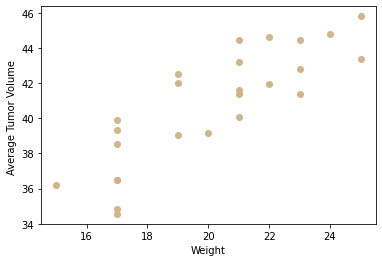

In [66]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
clean_data_Capomulin = clean_data_df.loc[clean_data_df['Drug Regimen'] == 'Capomulin']

weights = clean_data_Capomulin.groupby('Mouse ID')['Weight (g)'].max()
weights_df = pd.DataFrame(weights)

x_values = [vol for vol in weights_df['Weight (g)']]

average_tumor_volume = clean_data_Capomulin.groupby('Mouse ID')['Tumor Volume '].mean()
average_tumor_volume_df = pd.DataFrame(average_tumor_volume)

y_values = [vol for vol in average_tumor_volume_df['Tumor Volume (mm3)']]

plt.scatter(x_values,y_values, color='tan')
plt.xlabel('Weight')
plt.ylabel('Average Tumor Volume ')
plt.show()

The correlation between both factors is 0.84


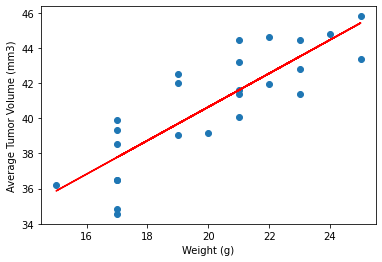

In [74]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

x_values_series = pd.Series(x_values, dtype='float64')

regress_values = x_values_series * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-",)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


# I had a hard time changing the colors on this chart 